In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


`geom_smooth()` using method = 'loess'


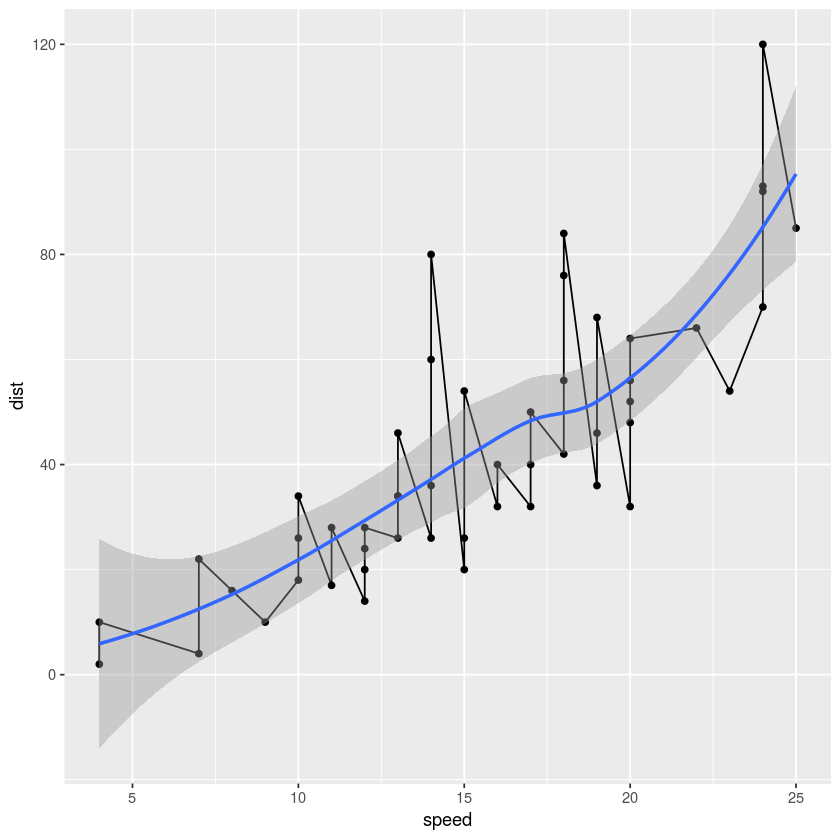

In [4]:
cars %>% ggplot(aes(speed,dist)) + geom_point() + geom_line() + geom_smooth()

In [5]:
library(raster)

Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select

The following object is masked from ‘package:tidyr’:

    extract



In [6]:
aso <- raster('/home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif')

In [7]:
mlp <- raster('/home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif')

In [8]:
mlp_veg <- mlp

In [9]:
#Read the DEM only
mlp_dem <- raster('/home/ubuntu/s3:::planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif')

In [10]:
#Read the base only
mlp_base <- raster('/home/ubuntu/s3:::planet-snowcover-experiments:planet-snowcover-2020-03-12-02-43-15-610:planet-snowcover-imagery:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif')

In [11]:
#read the veg+dem o
mlp_veg_dem <- raster('/home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-04-00-14-36-174:planet-snowcover-imagery-veg-dem:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds//20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif')

In [12]:
s <- stack(aso,mlp)

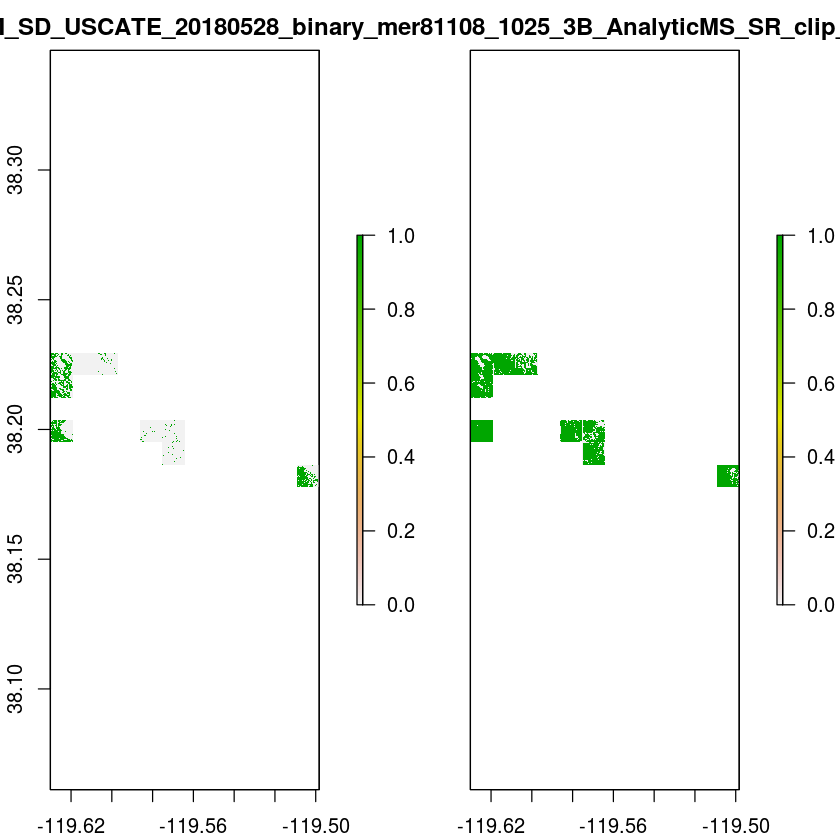

In [13]:
plot(s)

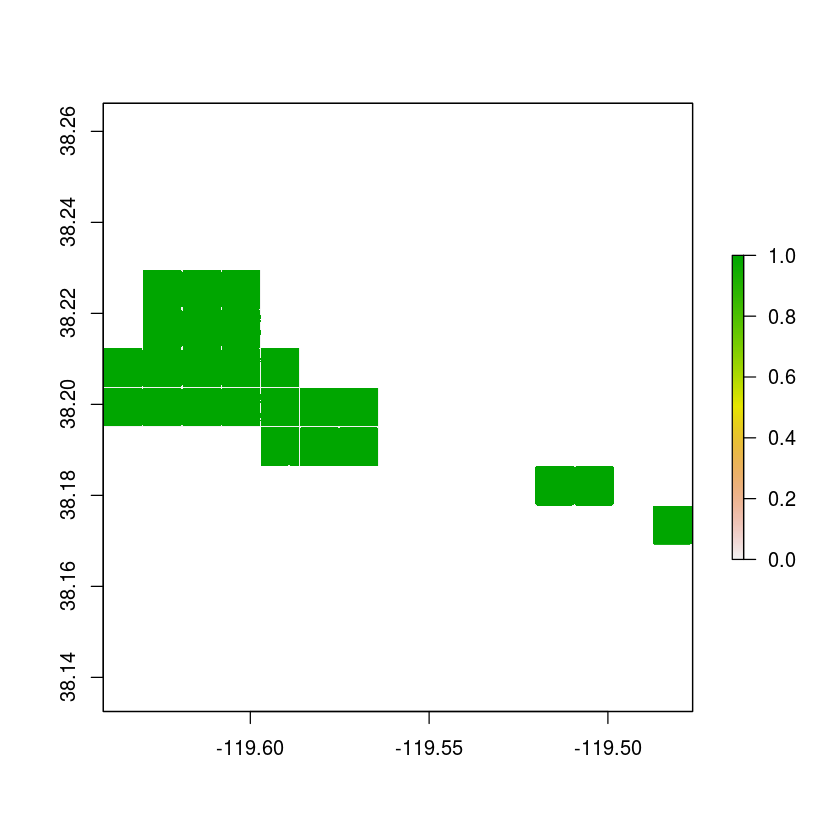

In [14]:
plot(mlp_dem)

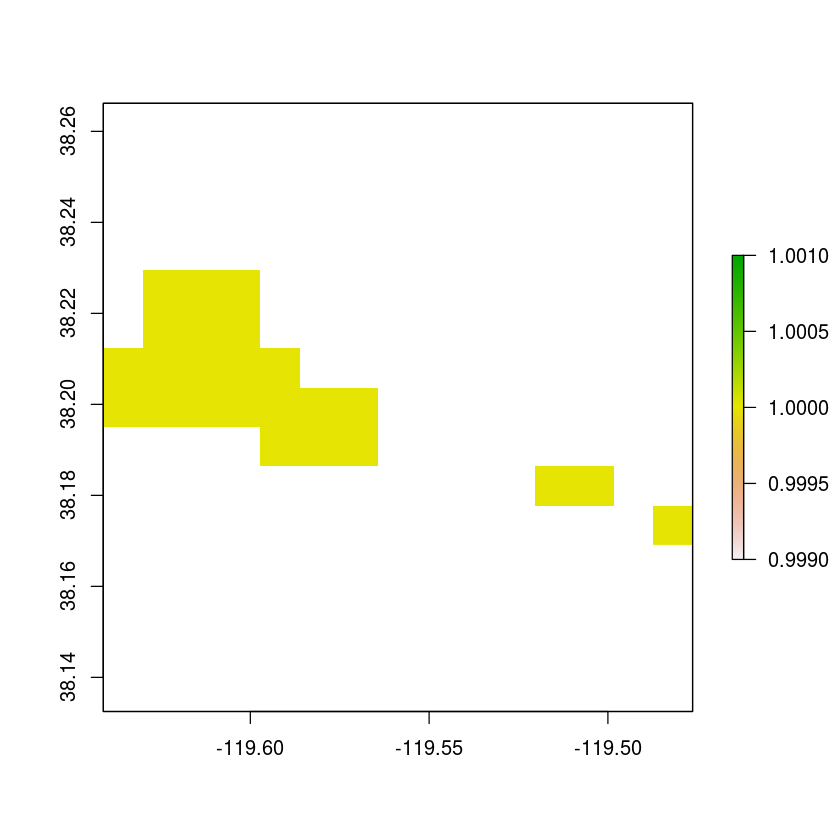

In [15]:
plot(mlp_base)

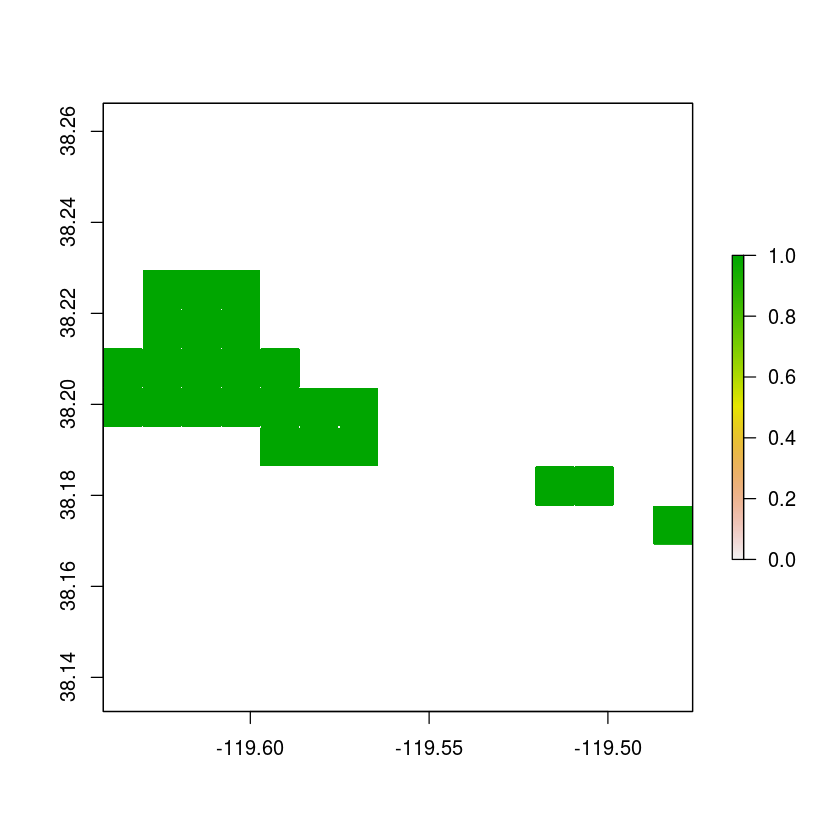

In [16]:
plot(mlp_veg_dem)

In [17]:
crs(mlp_dem)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [18]:
extent(mlp_dem)

class       : Extent 
xmin        : -119.6411 
xmax        : -119.4763 
ymin        : 38.16912 
ymax        : 38.22955 

In [19]:
mlp_dem

class       : RasterLayer 
dimensions  : 3585, 7680, 27532800  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6411, -119.4763, 38.16912, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/s3:::planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif 
names       : X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged 
values      : -32768, 32767  (min, max)


In [20]:
mlp_dem_cropped <- crop(mlp_dem, extent(s))

In [21]:
mlp_base_cropped <- crop(mlp_base,extent(s))

In [22]:
mlp_base

class       : RasterLayer 
dimensions  : 3584, 7680, 27525120  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.686281e-05  (x, y)
extent      : -119.6411, -119.4763, 38.16911, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/s3:::planet-snowcover-experiments:planet-snowcover-2020-03-12-02-43-15-610:planet-snowcover-imagery:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif 
names       : X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged 
values      : -32768, 32767  (min, max)


In [23]:
mlp_veg_dem_cropped <- crop(mlp_veg_dem,extent(s))

In [24]:
s <- stack(aso,mlp,mlp_dem_cropped)

In [25]:
mlp

class       : RasterLayer 
dimensions  : 3073, 6144, 18880512  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif 
names       : X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged 
values      : -32768, 32767  (min, max)


In [26]:
mlp_veg_dem_cropped

class       : RasterLayer 
dimensions  : 3072, 6144, 18874368  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.686281e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged 
values      : 0, 1  (min, max)


In [27]:
mlp_base_cropped

class       : RasterLayer 
dimensions  : 3072, 6144, 18874368  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.686281e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged 
values      : 1, 1  (min, max)


In [28]:
base_re <- projectRaster(mlp_base, s)
base_resamp <- resample(base_re, s, resample='bilinear')

In [29]:
veg_dem_re <- projectRaster(mlp_veg_dem, s)
veg_dem_resamp <- resample(veg_dem_re, s, resample='bilinear')

In [30]:
mlp_veg_dem_cropped <- crop(veg_dem_resamp,extent(s))

In [31]:
mlp_base_cropped <- crop(base_resamp,extent(s))

In [32]:
s <- stack(aso,mlp,mlp_dem_cropped,mlp_base_cropped,mlp_veg_dem_cropped)

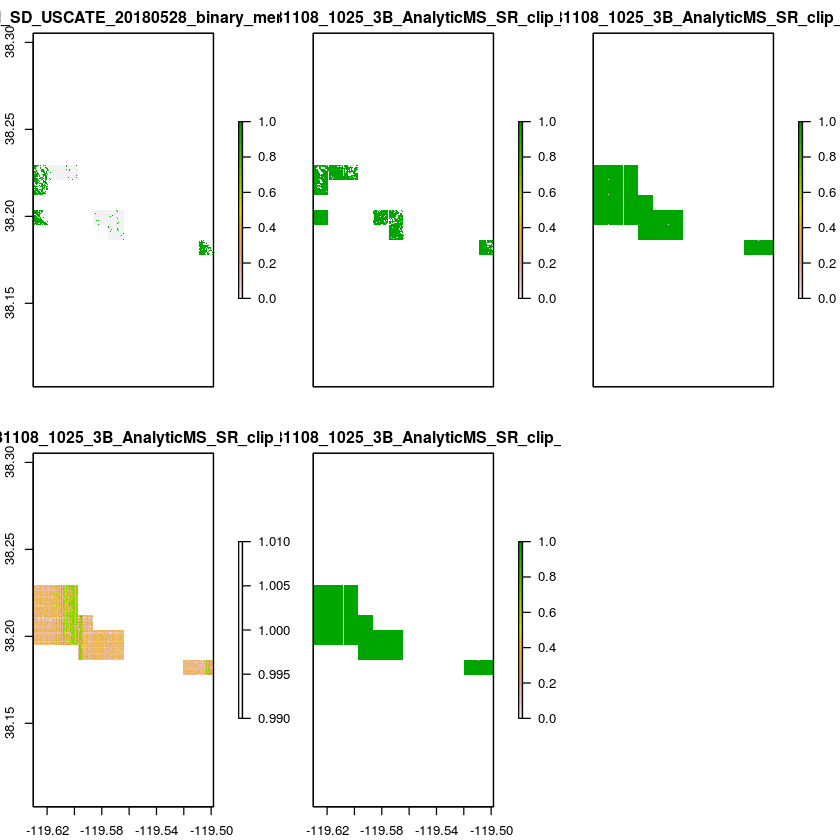

In [33]:
plot(s)

In [34]:
crs(s)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [35]:
veg <- raster('~/planet-snowcover/pipeline/veg.tiff')

In [36]:
crs(veg)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [37]:
extent(s)

class       : Extent 
xmin        : -119.6301 
xmax        : -119.4983 
ymin        : 38.17775 
ymax        : 38.22955 

In [38]:
extent(s)

class       : Extent 
xmin        : -119.6301 
xmax        : -119.4983 
ymin        : 38.17775 
ymax        : 38.22955 

In [39]:
s

class       : RasterStack 
dimensions  : 3073, 6144, 18880512, 5  (nrow, ncol, ncell, nlayers)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : ASO_3M_SD_USCATE_20180528_binary_merged, X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.1, X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.2, X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.3, X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.4 
min values  :                           -3.276800e+04,                                        -3.276800e+04,                                         0.000000e+00,                                         1.000000e+00,                                        -1.778842e-04 
max values  :                            32767.000000,                                         32767.000000,                                             1

In [40]:
aso

class       : RasterLayer 
dimensions  : 3073, 6144, 18880512  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif 
names       : ASO_3M_SD_USCATE_20180528_binary_merged 
values      : -32768, 32767  (min, max)


In [41]:
veg_re <- projectRaster(veg, s)
vegResamp <- resample(veg_re, s, resample='bilinear')

In [42]:
veg_crop<-crop(vegResamp,extent(s))



In [43]:
veg_crop

class       : RasterLayer 
dimensions  : 3073, 6144, 18880512  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : veg 
values      : 0, 25.92235  (min, max)


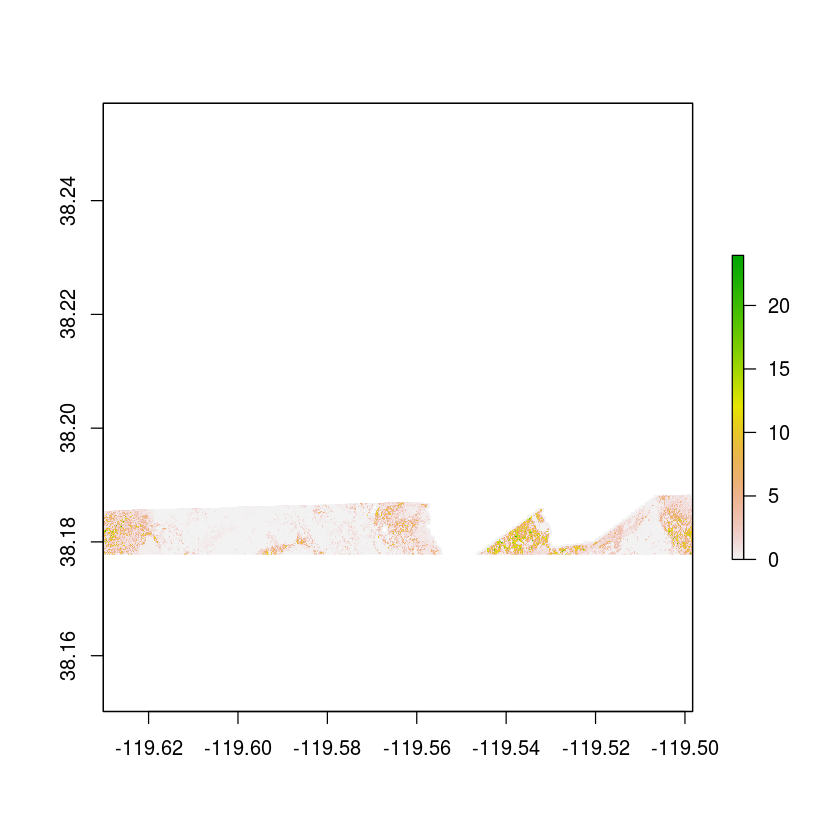

In [47]:
plot(veg_crop)

In [48]:
allthree <- stack (s,veg_crop)

In [49]:
data_matrix <- rasterToPoints(allthree)
head(data_matrix)

x,y,ASO_3M_SD_USCATE_20180528_binary_merged,X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.1,X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.2,X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.3,X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.4,veg
-119.6301,38.22954,1,0,0,1,0,NA
-119.6301,38.22954,1,0,0,1,0,NA
-119.6301,38.22954,1,0,0,1,0,NA
-119.6301,38.22954,1,0,0,1,0,NA
-119.6300,38.22954,1,0,0,1,0,NA
-119.6300,38.22954,1,0,0,1,0,NA


In [50]:
datafra_comb <- data_matrix %>% as.data.frame()

In [51]:
str(datafra_comb)

'data.frame':	7563591 obs. of  8 variables:
 $ x                                                   : num  -120 -120 -120 -120 -120 ...
 $ y                                                   : num  38.2 38.2 38.2 38.2 38.2 ...
 $ ASO_3M_SD_USCATE_20180528_binary_merged             : num  1 1 1 1 1 1 1 1 1 1 ...
 $ X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.1: num  0 0 0 0 0 0 0 0 0 0 ...
 $ X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.2: num  0 0 0 0 0 0 0 0 0 0 ...
 $ X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.3: num  1 1 1 1 1 1 1 1 1 1 ...
 $ X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.4: num  0 0 0 0 0 0 0 0 0 0 ...
 $ veg                                                 : num  NA NA NA NA NA NA NA NA NA NA ...


In [52]:
colnames(datafra_comb) <- c('x','y','aso','mlp','dem','base','veg_dem','veg')

In [56]:
datafra_comb %>% filter(!is.na(veg)) %>%filter(veg >2 & veg < 10) %>% tally()

n
432995


In [57]:
datafra_comb %>% filter(!is.na(veg)) %>% filter(veg >10 ) %>% tally()

n
51816


In [58]:
datafra_comb %>% filter(!is.na(veg)) %>% filter(veg <2 ) %>% tally()

n
2020117


In [59]:
datafra_comb %>% filter(!is.na(veg)) %>% filter(veg < 0.2)%>% tally()

n
1172470


In [54]:
# low vegeatation
library(caret)


Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [55]:
lo_veg <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg <.2 ) %>% as.data.frame()
low_veg_perf<- confusionMatrix(lo_veg$mlp, lo_veg$aso,)
low_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0   606   238
         1 16588 79386
                                          
               Accuracy : 0.8262          
                 95% CI : (0.8238, 0.8286)
    No Information Rate : 0.8224          
    P-Value [Acc > NIR] : 0.0009732       
                                          
                  Kappa : 0.0514          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.035245        
            Specificity : 0.997011        
         Pos Pred Value : 0.718009        
         Neg Pred Value : 0.827162        
             Prevalence : 0.177591        
         Detection Rate : 0.006259        
   Detection Prevalence : 0.008717        
      Balanced Accuracy : 0.516128        
                                          
       'Positive' Class : 0               
                                          

In [56]:
med_veg <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg >.2 & veg < 2) %>% as.data.frame()
med_veg_perf<- confusionMatrix(med_veg$mlp, med_veg$aso,mode = "prec_recall")
med_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0  4552  1007
         1 50203 38922
                                         
               Accuracy : 0.4591         
                 95% CI : (0.456, 0.4623)
    No Information Rate : 0.5783         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0496         
 Mcnemar's Test P-Value : <2e-16         
                                         
              Precision : 0.81885        
                 Recall : 0.08313        
                     F1 : 0.15094        
             Prevalence : 0.57829        
         Detection Rate : 0.04808        
   Detection Prevalence : 0.05871        
      Balanced Accuracy : 0.52896        
                                         
       'Positive' Class : 0              
                                         

In [57]:
high_veg <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg > 2) %>% as.data.frame()
high_veg_perf<- confusionMatrix(high_veg$mlp, high_veg$aso,mode = "prec_recall")
high_veg_perf


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 28341  1600
         1 46008  9889
                                         
               Accuracy : 0.4454         
                 95% CI : (0.442, 0.4487)
    No Information Rate : 0.8662         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0918         
 Mcnemar's Test P-Value : <2e-16         
                                         
              Precision : 0.9466         
                 Recall : 0.3812         
                     F1 : 0.5435         
             Prevalence : 0.8662         
         Detection Rate : 0.3302         
   Detection Prevalence : 0.3488         
      Balanced Accuracy : 0.6210         
                                         
       'Positive' Class : 0              
                                         

In [58]:
confusionMatrix(high_veg$mlp, high_veg$aso,mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 28341  1600
         1 46008  9889
                                         
               Accuracy : 0.4454         
                 95% CI : (0.442, 0.4487)
    No Information Rate : 0.8662         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0918         
 Mcnemar's Test P-Value : <2e-16         
                                         
              Precision : 0.9466         
                 Recall : 0.3812         
                     F1 : 0.5435         
             Prevalence : 0.8662         
         Detection Rate : 0.3302         
   Detection Prevalence : 0.3488         
      Balanced Accuracy : 0.6210         
                                         
       'Positive' Class : 0              
                                         

In [59]:
high_veg_perf$byClass

Sensitivity          Specificity       Pos Pred Value 
           0.3811887            0.8607364            0.9465616 
      Neg Pred Value            Precision               Recall 
           0.1769147            0.9465616            0.3811887 
                  F1           Prevalence       Detection Rate 
           0.5435037            0.8661548            0.3301685 
Detection Prevalence    Balanced Accuracy 
           0.3488082            0.6209625

In [60]:
ndf_veg <- cbind(high_veg_perf$overall %>% as.data.frame(),
      med_veg_perf$overall %>% as.data.frame(),
      low_veg_perf$overall %>% as.data.frame())

In [61]:
ndf_veg_f <- cbind(high_veg_perf$byClass %>% as.data.frame(),
                  med_veg_perf$byClass %>% as.data.frame(),
      low_veg_perf$byClass %>% as.data.frame())

In [62]:
high_veg_perf$byClass %>% as.data.frame() %>%  mutate(class=1)

.,class
0.3811887,1
0.8607364,1
0.9465616,1
0.1769147,1
0.9465616,1
0.3811887,1
0.5435037,1
0.8661548,1
0.3301685,1
0.3488082,1


In [63]:
ndf_veg_f['Fscore',] <- 2 * (ndf_veg_f['Precision',] * ndf_veg_f['Recall',]  )/
(ndf_veg_f['Precision',] + ndf_veg_f['Recall',] )

In [64]:
colnames(ndf_veg_f) <-  c('high','med','low')

In [65]:
ndf_veg_f

,high,med,low
Sensitivity,0.3811887,0.08313396,0.035244853
Specificity,0.8607364,0.97478023,0.997010951
Pos Pred Value,0.9465616,0.81885231,0.718009479
Neg Pred Value,0.1769147,0.43671248,0.827161523
Precision,0.9465616,0.81885231,0.718009479
Recall,0.3811887,0.08313396,0.035244853
F1,0.5435037,0.15094340,0.067191485
Prevalence,0.8661548,0.57829200,0.177590944
Detection Rate,0.3301685,0.04807570,0.006259167
Detection Prevalence,0.3488082,0.05871108,0.008717387


In [66]:
head(ndf_veg)

,.,.,.
Accuracy,0.44537384,0.45914832,0.8262100023
Kappa,0.09184753,0.04963481,0.0514271530
AccuracyLower,0.44204507,0.45597020,0.8238082126
AccuracyUpper,0.44870631,0.46232895,0.8285922327
AccuracyNull,0.86615485,0.57829200,0.8224090562
AccuracyPValue,1.00000000,1.00000000,0.0009732291


In [67]:
colnames(ndf_veg) <- c('high > 2m', 'med < 2m', 'low < .2m')

In [68]:
colnames(ndf_veg) <- c('high', 'med', 'low')

In [69]:
ndf_veg[1,c('high')]

[1] 0.4453738

In [70]:
ndf_veg['Accuracy',c('high')]

[1] 0.4453738

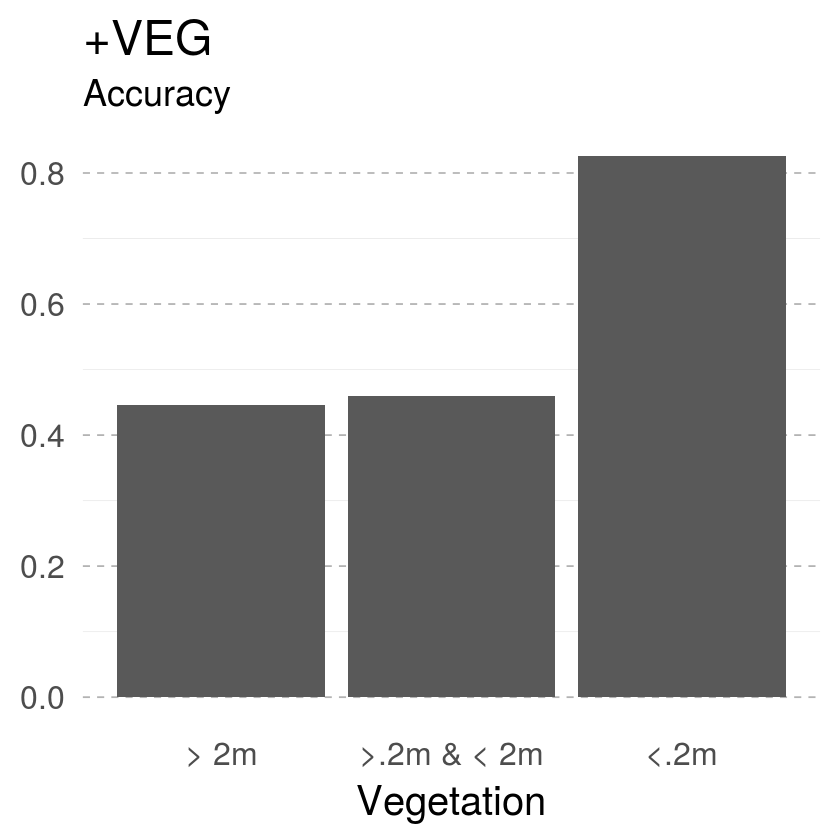

In [142]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_veg['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

a_veg <- ggplot() + 
geom_bar(aes(x='1',y=ndf_veg['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))


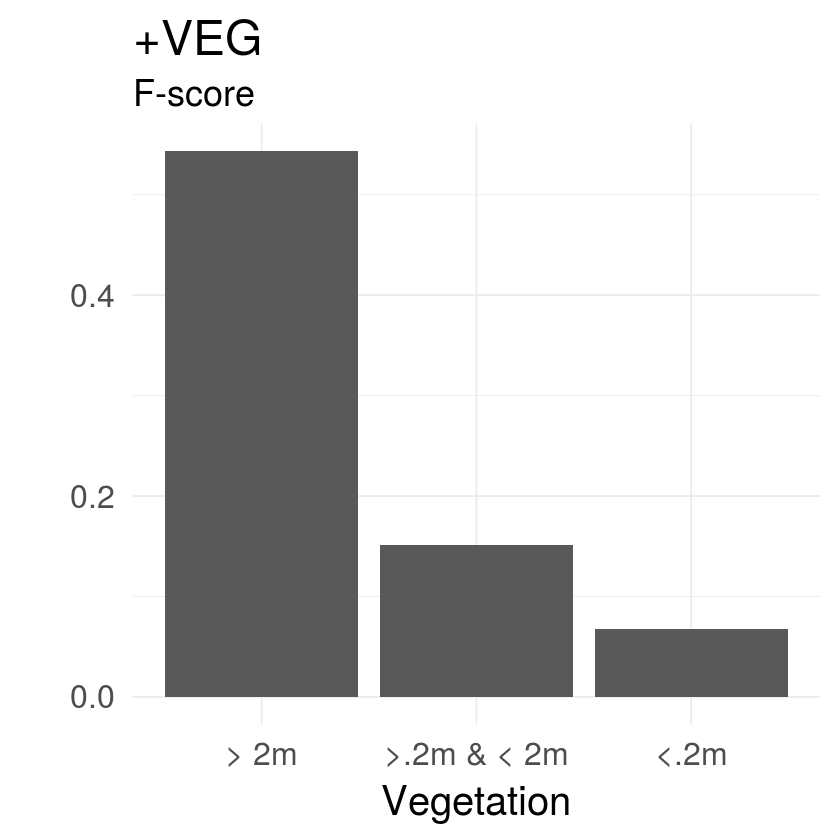

In [140]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

f_veg <- ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

In [107]:
# Plot base
lo_base <- datafra_comb %>% filter(!is.na(veg) & !is.na(base) & !is.na(aso)) %>% filter(veg <.2 ) %>% as.data.frame()
low_base_perf<- confusionMatrix(lo_base$base, lo_base$aso,mode = "prec_recall")
med_base <- datafra_comb %>% filter(!is.na(veg) & !is.na(base) & !is.na(aso)) %>% 
filter(veg >.2 & veg < 2) %>% as.data.frame()
med_base_perf<- confusionMatrix(med_base$base, med_base$aso,mode = "prec_recall")
high_base <- datafra_comb %>% filter(!is.na(veg) & !is.na(base) & !is.na(aso)) %>% filter(veg > 2) %>% as.data.frame()
high_base_perf<- confusionMatrix(high_base$base, high_base$aso,mode = "prec_recall")

Warning message in confusionMatrix.default(lo_base$base, lo_base$aso, mode = "prec_recall"):
“Levels are not in the same order for reference and data. Refactoring data to match.”Warning message in confusionMatrix.default(med_base$base, med_base$aso, mode = "prec_recall"):
“Levels are not in the same order for reference and data. Refactoring data to match.”Warning message in confusionMatrix.default(high_base$base, high_base$aso, mode = "prec_recall"):
“Levels are not in the same order for reference and data. Refactoring data to match.”

In [120]:
lo_base <- datafra_comb %>% filter(!is.na(veg) & !is.na(base) & !is.na(aso)) %>% filter(veg <.2 ) %>% as.data.frame()
low_base_perf<- confusionMatrix(lo_base$base, lo_base$aso,mode = "prec_recall")

Warning message in confusionMatrix.default(lo_base$base, lo_base$aso, mode = "prec_recall"):
“Levels are not in the same order for reference and data. Refactoring data to match.”

In [117]:
str(lo_base$aso)

 num [1:96818] 0 0 1 1 1 0 0 0 0 0 ...


In [75]:
head(datafra_comb)

x,y,aso,mlp,dem,base,veg_dem,veg
-119.6301,38.22954,1,0,0,1,0,NA
-119.6301,38.22954,1,0,0,1,0,NA
-119.6301,38.22954,1,0,0,1,0,NA
-119.6301,38.22954,1,0,0,1,0,NA
-119.6300,38.22954,1,0,0,1,0,NA
-119.6300,38.22954,1,0,0,1,0,NA


In [76]:
# Plot dem
lo_dem <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg <.2 ) %>% as.data.frame()
low_dem_perf<- confusionMatrix(lo_dem$dem, lo_dem$aso,mode = "prec_recall")
med_dem <- datafra_comb %>% filter(!is.na(veg)) %>% 
filter(veg >.2 & veg < 2) %>% as.data.frame()
med_dem_perf<- confusionMatrix(med_dem$dem, med_dem$aso,mode = "prec_recall")
high_dem <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg > 2) %>% as.data.frame()
high_dem_perf<- confusionMatrix(high_dem$dem, high_base$aso,mode = "prec_recall")

In [125]:
ndf_dem <- cbind(high_dem_perf$overall %>% as.data.frame(),
      med_dem_perf$overall %>% as.data.frame(),
      low_dem_perf$overall %>% as.data.frame())

In [123]:
ndf_dem_f <- cbind(high_dem_perf$byClass %>% as.data.frame(),
                  med_dem_perf$byClass %>% as.data.frame(),
      low_dem_perf$byClass %>% as.data.frame())

In [124]:
ndf_dem_f

,.,.,.
Sensitivity,0.02486920,0.03617934,0.03768757
Specificity,0.98598660,0.98625059,0.98762936
Pos Pred Value,0.91990050,0.78300395,0.39681568
Neg Pred Value,0.13513385,0.42732817,0.82617009
Precision,0.91990050,0.78300395,0.39681568
Recall,0.02486920,0.03617934,0.03768757
F1,0.04842913,0.06916296,0.06883731
Prevalence,0.86615485,0.57829200,0.17759094
Detection Rate,0.02154058,0.02092223,0.00669297
Detection Prevalence,0.02341620,0.02672046,0.01686670


In [126]:
colnames(ndf_dem_f) <- c('high', 'med', 'low')
colnames(ndf_dem) <- c('high', 'med', 'low')

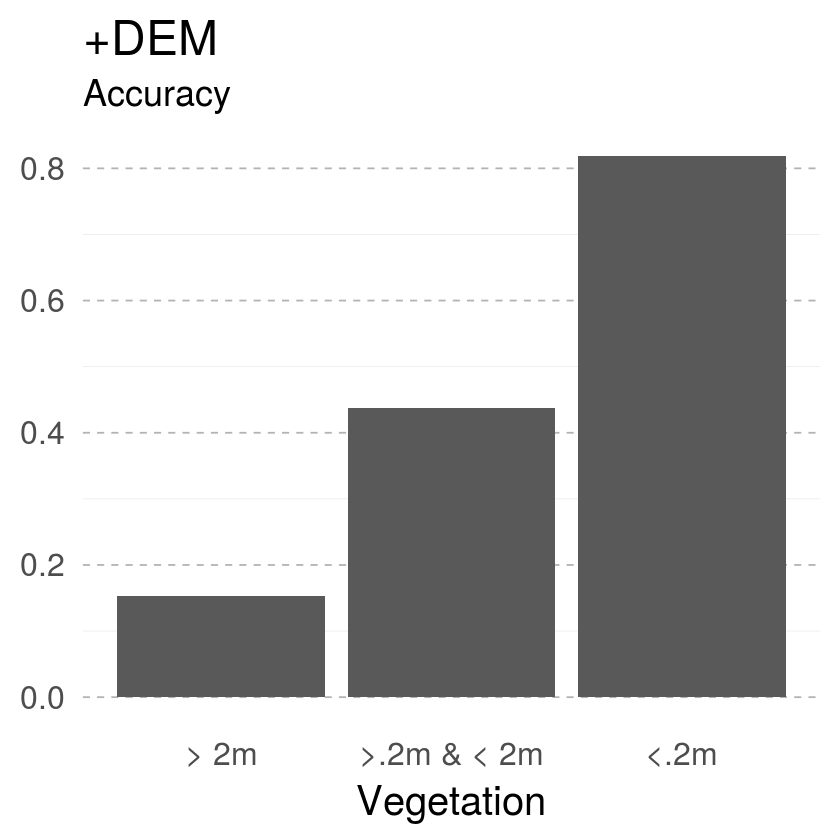

In [138]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_dem['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))
a_dem <- ggplot() + 
geom_bar(aes(x='1',y=ndf_dem['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

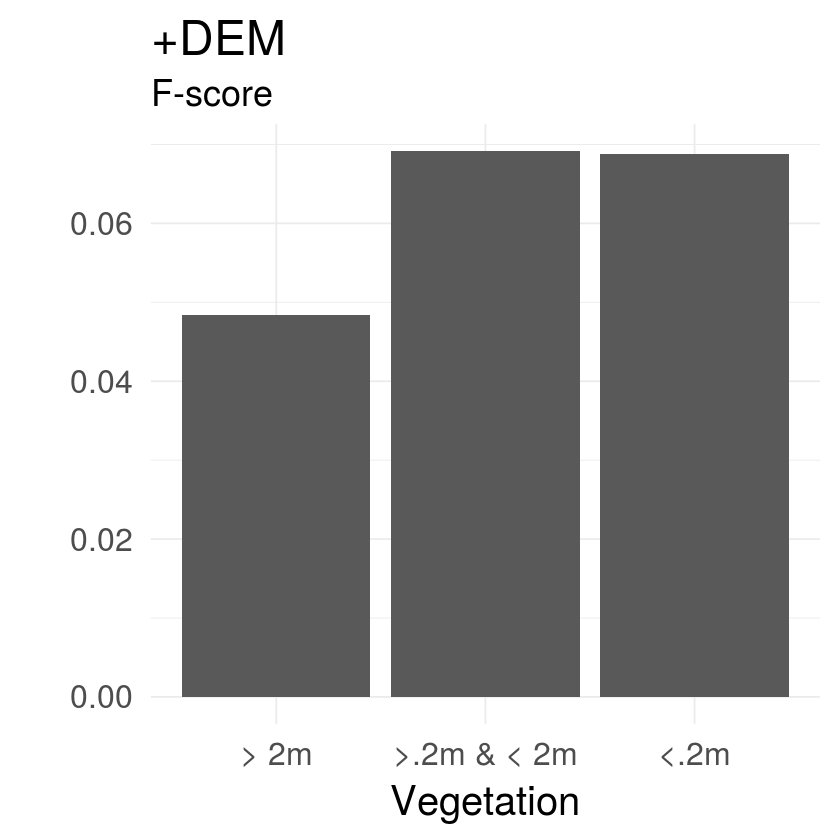

In [137]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_dem_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))
f_dem <-ggplot() + 
geom_bar(aes(x='1',y=ndf_dem_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

In [101]:
# Plot veg-dem
lo_veg_dem <- datafra_comb %>% filter(!is.na(veg) & !is.na(veg_dem)) %>% 
filter(veg <.2 ) %>% mutate (veg_dem_r = round(veg_dem)) %>% as.data.frame()
low_dem_perf<- confusionMatrix(lo_veg_dem$veg_dem_r, lo_veg_dem$aso,mode = "prec_recall")
med_veg_dem <- datafra_comb %>% filter(!is.na(veg) & !is.na(veg_dem)) %>% 
filter(veg >.2 & veg < 2) %>% mutate (veg_dem_r = round(veg_dem)) %>% as.data.frame()
med_veg_dem_perf<- confusionMatrix(med_veg_dem$veg_dem_r, med_veg_dem$aso,mode = "prec_recall")
high_veg_dem <- datafra_comb %>% filter(!is.na(veg)& !is.na(veg_dem)) %>% filter(veg > 2) %>% mutate (veg_dem_r = round(veg_dem)) %>% as.data.frame()
high_veg_dem_perf<- confusionMatrix(high_veg_dem$veg_dem_r, high_veg_dem$aso,mode = "prec_recall")

In [128]:
ndf_veg_dem <- cbind(high_veg_dem_perf$overall %>% as.data.frame(),
      med_veg_dem_perf$overall %>% as.data.frame(),
      low_dem_perf$overall %>% as.data.frame())

In [129]:
ndf_veg_dem_f <- cbind(high_veg_dem_perf$byClass %>% as.data.frame(),
                  med_veg_dem_perf$byClass %>% as.data.frame(),
      low_dem_perf$byClass %>% as.data.frame())

In [130]:
colnames(ndf_veg_dem) <- c('high', 'med', 'low')
colnames(ndf_veg_dem_f) <- c('high', 'med', 'low')

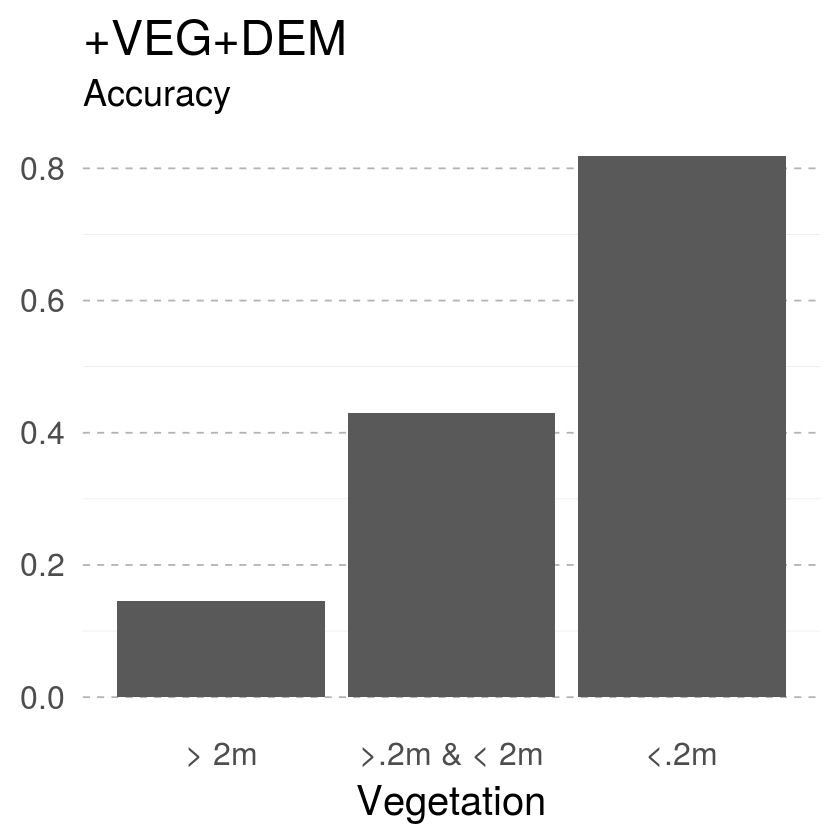

In [136]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_dem['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_dem['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_dem['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+VEG+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))
a_veg_dem <-ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_dem['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_dem['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_dem['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+VEG+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

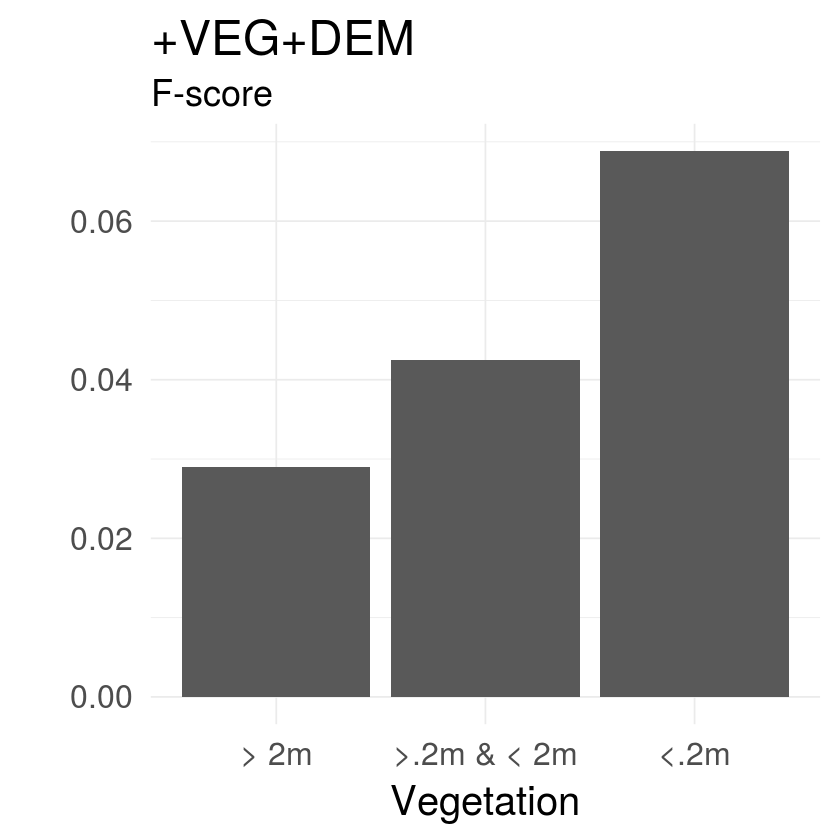

In [135]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_dem_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_dem_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_dem_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+VEG+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))
f_veg_dem <- ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_dem_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_dem_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_dem_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+VEG+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

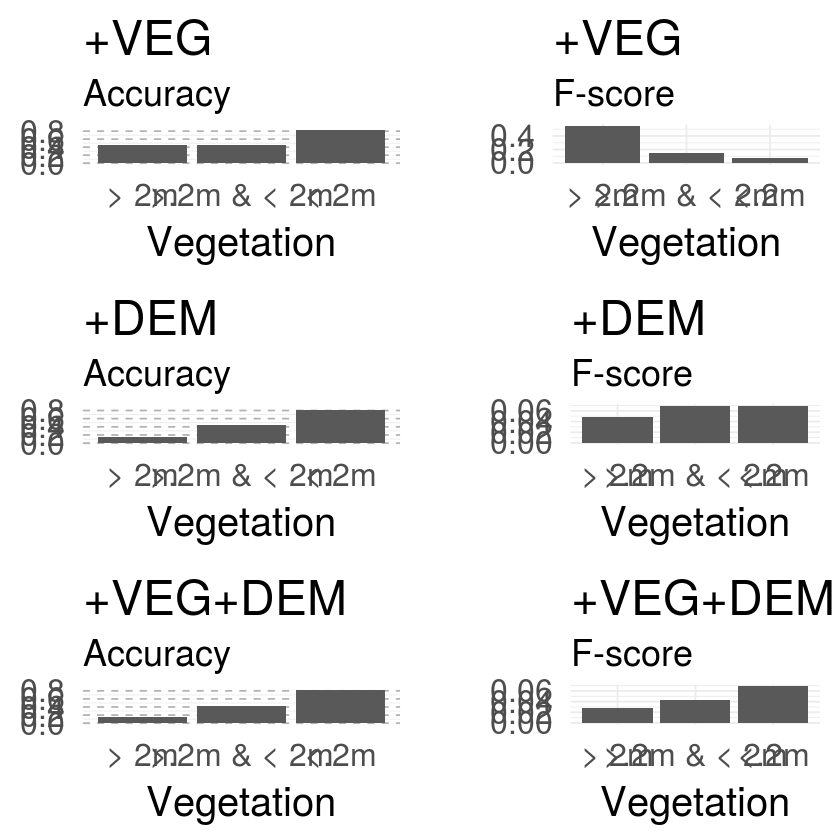

In [146]:
library(cowplot)
plot_grid(a_veg ,f_veg,a_dem ,f_dem ,a_veg_dem ,f_veg_dem,ncol=2,nrow=3)
ggsave("models_sc.png",dpi=300, dev='png', height=12, width=12, units="in")